<a href="https://colab.research.google.com/github/pietromarini00/30412-Classification-with-LogisticRegression/blob/main/Marketing_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
Data = pd.read_stata('Marketing Insight.dta')
Data

,id,year,assets,debt,earnings,cashflow,sales,mv,ad,rd,fv,mkt,sector
0,2.0,1991-01-01,34.150,12.901,6.133,-4.760,40.661,93.641594,0.848000,1.942000,2.556972,13.551000,1.0
1,2.0,1992-01-01,100.190,73.684,5.239,5.642,54.998,63.700230,0.880000,2.469000,1.125154,20.593000,1.0
2,2.0,1993-01-01,89.988,73.488,13.044,7.724,69.560,49.590862,1.168000,4.791000,1.165176,26.938999,1.0
3,2.0,1994-01-01,89.778,72.782,13.605,6.720,68.097,53.476501,1.503000,4.783000,1.190308,24.464001,1.0
4,3.0,1990-01-01,6.130,1.790,0.796,0.805,7.388,1.752816,0.009000,0.206000,0.536348,1.611000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29884,4756.0,2015-01-01,8092.460,2040.375,-294.039,-524.499,4046.025,31543.314453,58.299999,717.900024,4.153050,863.932007,1.0
29885,4756.0,2016-01-01,22664.076,6053.860,301.459,-123.829,7000.132,34523.968750,48.000000,834.408020,1.771307,1362.489014,1.0
29886,4756.0,2017-01-01,28655.372,9486.248,70.917,-60.654,11758.751,52554.945312,66.500000,1378.072998,2.203613,2343.000000,1.0
29887,4756.0,2018-01-01,29739.614,9454.055,1634.946,2097.802,21461.268,57442.277344,70.000000,1473.634033,2.306088,2751.227051,1.0


In [40]:
len(Data['year'].unique()) # how many years have been recorded ? 

30

In [41]:
sectors = {1: 'Manufacturing', 2: 'Wholesale', 3: 'Retailing', 4: 'Information Technology', 
           5: 'Service Sector(Technical Services, Professional and Administrative Services, and Education Services)',
           6: 'Healthcare', 7: 'Arts and Entertainment', 8: 'Accommodation and Full Service Restaurants'}
sectors

{1: 'Manufacturing',
 2: 'Wholesale',
 3: 'Retailing',
 4: 'Information Technology',
 5: 'Service Sector(Technical Services, Professional and Administrative Services, and Education Services)',
 6: 'Healthcare',
 7: 'Arts and Entertainment',
 8: 'Accommodation and Full Service Restaurants'}

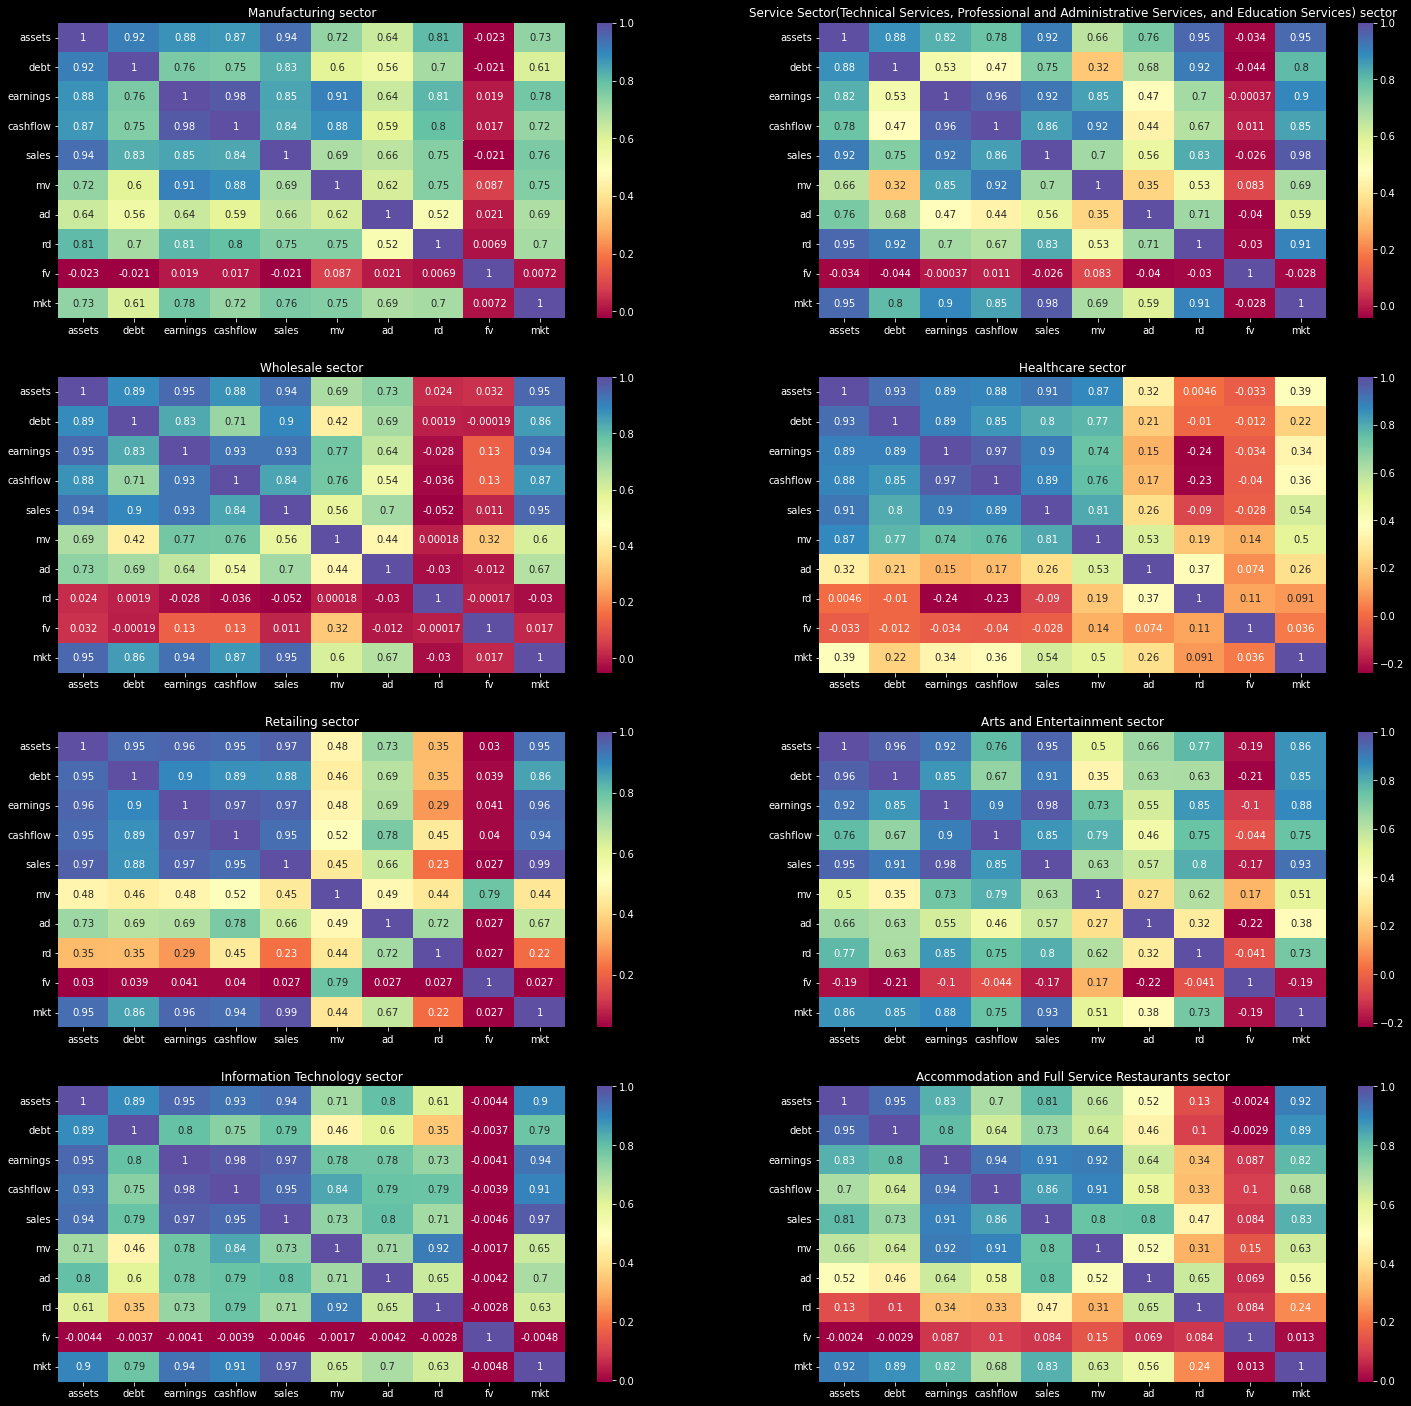

In [42]:
fig, axs = plt.subplots(4,2,figsize=(25,25))
plt.style.use(['dark_background'])

for x in sectors:
  sector_x_data = Data.loc[Data['sector'] == float(x)]
  corr_matrix = sector_x_data.corr()
  map = corr_matrix.drop(['id','sector']).drop(['id','sector'],axis=1)
  axs[(x-1)%4,(x-1)//4].title.set_text(f'{sectors[x]} sector')
  sns.heatmap(map, annot=True,ax=axs[(x-1)%4,(x-1)//4],cmap='Spectral')

calculate sector size in each year

In [45]:
years = np.array(sorted(Data['year'].unique())).reshape(30)
size = np.zeros((len(sectors),len(years)))

for i in range(len(sectors)):
  sector_x_data = Data.loc[Data['sector'] == float(i+1)]
  for j in range(len(years)):
    competitors = sector_x_data.loc[sector_x_data['year'] == years[j]]
    size[i,j]=sum(competitors['sales'])

size_df = pd.DataFrame(size, columns=years, index=sectors.values())
size_df

,1990-01-01,1991-01-01,1992-01-01,1993-01-01,1994-01-01,1995-01-01,1996-01-01,1997-01-01,1998-01-01,1999-01-01,2000-01-01,2001-01-01,2002-01-01,2003-01-01,2004-01-01,2005-01-01,2006-01-01,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01
Manufacturing,644237.585,658987.588,770437.159,731597.304,621532.745,798401.505,863987.045,876048.069,1040131.991,1130663.982,1228549.031,1293344.788,1397922.845,1801318.593,2093918.612,2096754.988,2325350.249,2402402.504,2360481.785,2391633.355,2473963.239,2602889.226,3010787.960,2957434.805,2612548.424,2548286.337,2439485.504,2503875.210,2666553.320,2192331.959
Wholesale,2989.910,3399.516,3902.311,4814.158,902.708,4723.148,11011.492,8499.758,5889.417,13339.486,17427.139,39317.408,43330.422,51960.389,78771.180,75013.178,85542.665,89313.663,88462.018,89702.774,91865.708,95497.344,79824.761,76258.178,87584.424,84507.170,102801.905,92138.289,84866.333,87281.932
Retailing,171136.257,189362.073,218967.808,250995.275,170390.922,172036.900,206009.281,264783.348,435480.598,546509.149,631742.993,773195.518,856708.556,922480.602,975536.640,1082498.063,1093422.522,1133732.161,1159189.465,1181226.583,1252932.260,1330431.952,1463040.497,1549128.439,1615929.843,1650751.697,1704247.978,1796276.912,1896105.455,801506.797
Information Technology,87663.949,95571.255,97568.667,101791.934,148595.142,160737.559,141366.767,172295.379,186627.398,243389.026,283977.138,367425.474,389715.741,616790.958,619326.994,558435.787,613599.727,691985.022,717033.258,664377.370,723289.577,772910.528,788413.983,821979.830,902260.457,954091.644,1017549.561,1155468.109,1091392.525,1063515.372
"Service Sector(Technical Services, Professional and Administrative Services, and Education Services)",39295.766,34847.003,34770.664,41751.388,46139.158,44450.618,51912.957,50895.530,58246.044,74849.074,60937.195,69045.331,71380.573,81029.750,82315.034,41388.217,43738.273,48804.055,52719.234,47718.301,48453.649,50727.295,53882.981,61449.774,66125.760,67887.277,71191.916,72534.505,81085.419,63281.096
Healthcare,456.034,66.440,92.442,189.565,123.971,119.677,353.955,489.947,569.942,2661.611,2880.992,3295.785,3696.577,4293.444,4732.414,5948.225,8649.125,4400.162,5137.436,5640.726,4848.813,6454.560,4753.963,4453.685,4726.306,5973.490,6561.598,7282.955,7203.576,8046.991
Arts and Entertainment,210.257,237.363,453.607,1296.673,769.838,1119.539,886.370,1727.228,2579.400,2939.140,3570.201,3134.392,3301.357,5819.686,6189.247,5184.845,5130.647,5428.507,5313.475,4709.546,4461.520,4674.132,4966.715,5393.502,5112.628,11598.253,14087.024,12063.305,10604.873,11620.825
Accommodation and Full Service Restaurants,7289.205,8385.625,11721.431,11798.978,6781.630,10631.572,13870.329,26353.358,24855.089,27972.038,33117.461,35681.823,45632.408,58894.177,67284.969,77631.163,96509.253,92961.860,98209.552,84225.934,83959.767,95525.538,99701.473,100061.420,103763.645,96591.531,86860.172,89286.778,112775.606,92051.271


In [46]:
market_share = np.zeros(Data.shape[0])
for i in range(len(market_share)):
  sector_size = size_df[Data.iloc[i]['year']][sectors[int(Data.iloc[i]['sector'])]]
  firm_sales = Data.iloc[i]['sales']
  market_share[i] = firm_sales/sector_size

Data['market share'] = market_share

In [66]:
Data['sector'] = Data['sector'].astype(int)
HHI = np.zeros((len(sectors),len(years)))

for i in range(len(sectors)):
  for j in range(len(years)):
    subset = Data[(Data['sector'] == i+1) & (Data['year']==years[j])]
    HHI[i,j] = sum((100*subset['market share'])**2)

HHI_df = pd.DataFrame(HHI, columns=years, index=sectors.values())
HHI_df

,1990-01-01,1991-01-01,1992-01-01,1993-01-01,1994-01-01,1995-01-01,1996-01-01,1997-01-01,1998-01-01,1999-01-01,2000-01-01,2001-01-01,2002-01-01,2003-01-01,2004-01-01,2005-01-01,2006-01-01,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01
Manufacturing,219.799768,213.811773,222.192255,172.435274,296.933024,314.450050,282.741868,263.675032,306.733027,308.529173,280.972315,265.670250,274.328259,321.959635,284.651792,278.923607,279.858488,284.918275,237.643411,246.473728,251.598495,242.128129,251.345486,266.296630,280.323209,314.278894,277.172464,288.892960,277.683613,230.020822
Wholesale,1437.437007,1317.785287,1228.092504,1240.440445,2863.289109,4474.416649,2410.718798,2985.036248,1547.819570,1650.506669,1313.155799,2184.647110,2478.601889,2006.789005,1163.097274,1163.477054,2224.894741,2683.387669,2785.715629,2382.272660,2051.021697,1844.076248,1101.510149,1311.451192,1216.118511,1311.422776,1113.891999,1181.938318,1325.871226,1318.057892
Retailing,750.723861,741.959454,639.819274,485.603083,801.525031,789.898833,579.918024,488.864187,1225.259385,1127.452492,1103.351316,994.087309,997.844538,971.871303,1051.236934,1043.887961,1223.435695,1323.271137,1432.800814,1412.669777,1342.900362,1345.289434,1253.236715,1164.760884,1137.888097,1111.996095,1109.464589,1105.091532,1114.021798,2385.053847
Information Technology,4354.289783,4584.341207,4636.472835,4553.898251,4419.226525,4463.724994,4263.367790,3201.569701,2979.427917,2173.994082,1740.783811,1152.602226,999.885375,880.791271,906.761848,884.440996,841.719727,937.032418,931.656948,1018.238250,993.565589,953.761333,889.944562,817.743654,716.477704,727.418936,730.293795,667.960957,799.352569,1010.188007
"Service Sector(Technical Services, Professional and Administrative Services, and Education Services)",4779.016284,6703.705561,7741.161218,7128.635622,8829.671183,8573.755714,6086.293030,5503.162596,5073.481619,4491.726159,5131.748125,3463.146019,3523.690557,3733.797653,3445.045622,1998.242257,2012.216031,2144.494707,2476.641958,2526.772132,2427.790698,3062.022914,3212.805423,2653.580374,2538.780281,2579.886376,2693.843181,2892.953646,2930.026805,4779.581871
Healthcare,5819.021613,2983.117761,2161.031395,2389.541726,4634.654029,8675.744575,4126.543063,3069.259294,3987.774986,6584.604839,6962.579970,6785.621218,6281.791349,5130.140305,4766.952331,3617.341200,2429.580979,1928.673815,1911.469920,1684.180853,2167.556020,2025.248241,3097.931221,3421.855583,3317.838346,3317.769176,3682.936540,3492.960005,4119.749608,3944.697925
Arts and Entertainment,10000.000000,10000.000000,7897.015634,2373.599401,2290.617243,2300.007880,3273.405014,2883.560523,2547.832931,2568.417579,2356.001628,2987.921317,2898.226084,2453.622762,2527.319926,2977.348080,3189.053909,3160.129623,3119.196858,2941.037919,3062.808182,2760.412023,2824.386702,2722.228389,2604.115411,2367.847961,2133.163944,2477.621212,2803.131206,2552.982627
Accommodation and Full Service Restaurants,658.466992,546.698657,511.530592,457.383971,853.417308,1178.165064,783.408214,1621.323720,1505.067548,1150.985225,837.764485,847.208275,678.561410,591.478062,561.944140,579.948722,514.387842,612.821230,587.959403,578.658156,675.447121,699.604344,690.324230,722.232164,707.834131,650.949614,600.351853,693.314911,844.720067,758.135599


In [84]:
market_growth = np.zeros((len(sectors),len(years)))

for i in range(len(sectors)):
  for j in range(1,len(years)):
    market_growth[i,j] = np.log(size[i,j]) - np.log(size[i,j-1])

market_growth_df = pd.DataFrame(market_growth, columns=years, index=sectors.values())
market_growth_df

,1990-01-01,1991-01-01,1992-01-01,1993-01-01,1994-01-01,1995-01-01,1996-01-01,1997-01-01,1998-01-01,1999-01-01,2000-01-01,2001-01-01,2002-01-01,2003-01-01,2004-01-01,2005-01-01,2006-01-01,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01
Manufacturing,0.0,0.022637,0.156253,-0.051728,-0.163042,0.250423,0.078946,0.013863,0.171682,0.083457,0.083029,0.051398,0.077756,0.253531,0.150518,0.001354,0.103480,0.032599,-0.017604,0.013111,0.033845,0.050801,0.145580,-0.017880,-0.123996,-0.024905,-0.043634,0.026052,0.062947,-0.195821
Wholesale,0.0,0.128390,0.137936,0.209992,-1.673917,1.654832,0.846464,-0.258902,-0.366881,0.817571,0.267300,0.813639,0.097188,0.181627,0.416066,-0.048883,0.131351,0.043139,-0.009581,0.013928,0.023826,0.038771,-0.179265,-0.045709,0.138479,-0.035767,0.195968,-0.109513,-0.082213,0.028066
Retailing,0.0,0.101201,0.145264,0.136509,-0.387339,0.009614,0.180212,0.250991,0.497538,0.227101,0.144932,0.202049,0.102566,0.073969,0.055921,0.104039,0.010041,0.036202,0.022206,0.018832,0.058933,0.060017,0.095013,0.057176,0.042218,0.021320,0.031893,0.052592,0.054086,-0.861064
Information Technology,0.0,0.086361,0.020684,0.042374,0.378295,0.078548,-0.128415,0.197853,0.079904,0.265547,0.154233,0.257627,0.058897,0.459113,0.004103,-0.103494,0.094203,0.120222,0.035558,-0.076272,0.084959,0.066354,0.019860,0.041693,0.093187,0.055856,0.064393,0.127108,-0.057051,-0.025875
"Service Sector(Technical Services, Professional and Administrative Services, and Education Services)",0.0,-0.120150,-0.002193,0.182959,0.099929,-0.037283,0.155190,-0.019793,0.134901,0.250798,-0.205630,0.124920,0.033262,0.126791,0.015737,-0.687558,0.055227,0.109590,0.077167,-0.099665,0.015293,0.045856,0.060351,0.131405,0.073338,0.026290,0.047531,0.018683,0.111441,-0.247917
Healthcare,0.0,-1.926268,0.330282,0.718151,-0.424684,-0.035251,1.084373,0.325127,0.151237,1.541152,0.079203,0.134510,0.114763,0.149682,0.097346,0.228657,0.374365,-0.675817,0.154913,0.093459,-0.151279,0.286053,-0.305808,-0.065247,0.059412,0.234187,0.093903,0.104303,-0.010959,0.110721
Arts and Entertainment,0.0,0.121260,0.647641,1.050326,-0.521377,0.374492,-0.233538,0.667139,0.401039,0.130560,0.194505,-0.130187,0.051898,0.566913,0.061567,-0.177073,-0.010508,0.056432,-0.021418,-0.120655,-0.054102,0.046554,0.060715,0.082436,-0.053481,0.819141,0.194400,-0.155086,-0.128855,0.091485
Accommodation and Full Service Restaurants,0.0,0.140124,0.334900,0.006594,-0.553795,0.449611,0.265924,0.641844,-0.058533,0.118143,0.168855,0.074581,0.245977,0.255124,0.133195,0.143032,0.217670,-0.037450,0.054914,-0.153601,-0.003165,0.129056,0.042787,0.003604,0.036331,-0.071625,-0.106191,0.027554,0.233547,-0.203054


In [78]:
np.log(size[i,0]) - np.log(size[i,1-1])

0.14012444378673905